In [1]:
import pandas as pd

In [4]:
IRA_tweets_1 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_1.csv")
IRA_tweets_2 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_2.csv")
IRA_tweets_3 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_3.csv")
IRA_tweets_4 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_4.csv")
IRA_tweets_5 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_5.csv")
IRA_tweets_6 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_6.csv")
IRA_tweets_7 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_7.csv")
IRA_tweets_8 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_8.csv")
IRA_tweets_9 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_9.csv")
IRA_tweets_10 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_10.csv")
IRA_tweets_11 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_11.csv")
IRA_tweets_12 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_12.csv")
IRA_tweets_13 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_13.csv")

In [6]:
IRA_allfiles = [IRA_tweets_1, IRA_tweets_2, IRA_tweets_3, IRA_tweets_4, IRA_tweets_5, IRA_tweets_6, IRA_tweets_7, IRA_tweets_8, IRA_tweets_9, IRA_tweets_10, IRA_tweets_11, IRA_tweets_12, IRA_tweets_13]
IRA_bigdf = pd.concat(IRA_allfiles)

In [7]:
# We only want English language text

IRA_bigdf = IRA_bigdf[IRA_bigdf['language'] == 'English']
IRA_bigdf.shape

(2116867, 21)

In [9]:
IRAall_texts0 = IRA_bigdf['content']

In [10]:
IRAall_texts0 = ' '.join([str(elem) for elem in IRAall_texts0])

In [11]:
IRAall_texts0 = IRAall_texts0.split()

In [14]:
import re
clean_tweets = []
for tweet in IRAall_texts0:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    #Here's where all the cleaning takes place
    clean_tweets.append(tweet)
IRAall_texts0 = clean_tweets

In [15]:
# Sentence Tokenize (word2vec takes sentences)

import nltk
nltk.download('punkt')
sentences = [sentence for tweet in IRAall_texts0 for sentence in nltk.sent_tokenize(tweet)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def fast_tokenize(IRAall_texts0):
    
    # Get a list of punctuation marks
    from string import punctuation
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in IRAall_texts0 if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

In [19]:
# Word tokenize

words_by_sentence = [fast_tokenize(sentence.lower()) for sentence in sentences]

In [20]:
# Inspect # Sanity check

words_by_sentence[0:5], len(words_by_sentence)

([['we'], ['have'], ['a'], ['sitting'], ['democrat']], 24947557)

In [21]:
#Train word2vec using CBOW

# CBOW vs SKIP GRAM information

import gensim
model = gensim.models.Word2Vec(words_by_sentence, window=5, \
                               min_count=5, sg=0, alpha=0.025, batch_words=10000)

In [22]:
# OK model is trained, let's use it to explore our corpus

# Return dense word vector, we'll be able to see 100 words and how close they are to the word 'trump'
model.wv['trump']

array([-0.00950012,  0.00956222, -0.00777076, -0.00264551, -0.00490641,
       -0.0049667 , -0.00802359, -0.00778358, -0.00455321, -0.00127536,
       -0.00510299,  0.00614054, -0.00951662, -0.0053071 ,  0.00943715,
        0.00699133,  0.00767581,  0.00423474,  0.00050709, -0.00598114,
        0.00601878,  0.00263503,  0.00769943,  0.00639384,  0.00794257,
        0.00865741, -0.00989576, -0.0067557 ,  0.00133757,  0.0064403 ,
        0.00737381,  0.00551698,  0.00766162, -0.00512557,  0.00658441,
       -0.00410837, -0.00905534,  0.00914168,  0.0013314 , -0.00275968,
       -0.00247784, -0.00422048,  0.00481234,  0.00440022, -0.00265336,
       -0.00734188, -0.00356585, -0.00033662,  0.00609589, -0.00283734,
       -0.00012089,  0.00087973, -0.00709565,  0.002065  , -0.00143242,
        0.00280215,  0.00484222, -0.00135202, -0.00278014,  0.00773865,
        0.0050456 ,  0.00671352,  0.00451564,  0.00866715,  0.00747497,
       -0.00108189,  0.00874764,  0.00460172,  0.00544063, -0.00

In [86]:
model.wv.most_similar(positive=['trump'], topn=10)

[('srinivas', 0.41791751980781555),
 ('trumped', 0.4107331335544586),
 ('i15', 0.39879587292671204),
 ('photogate', 0.3865368664264679),
 ('“she', 0.3852027356624603),
 ('raisedfist', 0.3835470676422119),
 ('rangel', 0.3745536208152771),
 ('mismatch', 0.37148329615592957),
 ('kimkardashian', 0.37126851081848145),
 ('omaha', 0.3698345422744751)]

In [31]:
# Find cosine distance between two clusters of word vectors
# Each cluster is measured as the mean of its words

model.wv.n_similarity(['trump','democracy'],['hilary','democracy'])

0.5274745

In [32]:
# Finds mean vector of words in list
# and identifies the word further from that mean

model.wv.doesnt_match(['trump','democracy', 'freedom'])

'democracy'

In [83]:
# Most similar terms

model.wv.most_similar(positive=['trump', 'freedom'], topn=10)

[('shave', 0.40912172198295593),
 ('sister’s', 0.394317090511322),
 ('ac…', 0.37732642889022827),
 ('chachi', 0.37455374002456665),
 ('photogate', 0.3685385286808014),
 ('biff', 0.3595733940601349),
 ('passerby', 0.35515421628952026),
 ('hate', 0.3534519076347351),
 ('unmentioned', 0.3521404564380646),
 ('offend', 0.35208383202552795)]

In [33]:
# Vector arithmetic

model.wv.most_similar(positive=['man', 'president'], negative=['woman'], topn=10)

[('grayslake', 0.4189106523990631),
 ('hierarchy', 0.4024028182029724),
 ('outside', 0.3799859881401062),
 ('americaisoverparty', 0.37502139806747437),
 ('gloria', 0.3691903054714203),
 ('addicts', 0.3689875602722168),
 ('altering', 0.3665294647216797),
 ('disneythemed', 0.3647427260875702),
 ('ibm', 0.3646540343761444),
 ('address', 0.36388489603996277)]

In [53]:
# Let's do a simple visualization of a vector

# Instantiate a vector

white_vector = model.wv.most_similar(positive=['trump', 'white'], topn=15)

# Just get words

white_tokens = [token for token, weight in white_vector]

In [55]:
# Get the vector for each sampled word

vectors = [model.wv[word] for word in white_tokens] 

In [56]:
# Calculate distances among texts in vector space

from sklearn.metrics import pairwise
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [57]:
# Multi-Dimensional Scaling

from sklearn.manifold import MDS
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

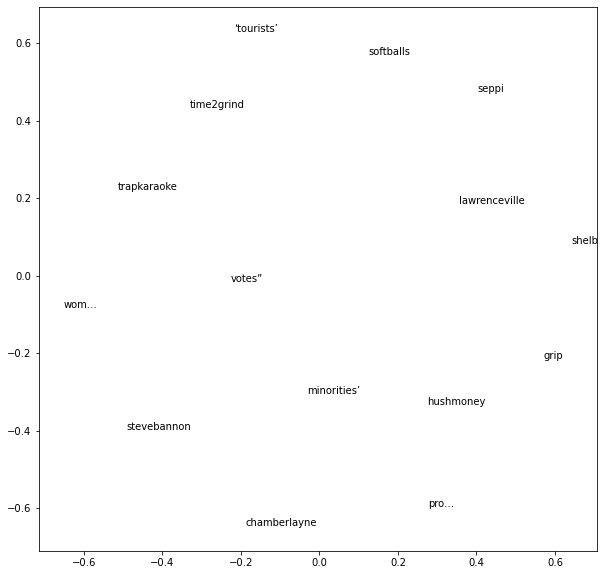

In [58]:
# Matplotlib

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(white_tokens[i], ((embeddings[i,0], embeddings[i,1])))

In [84]:
### Words in relation to vectors

america_terms = model.wv.most_similar(positive=['america'], topn=20)
america_terms = [word for word, score in america_terms]

trump_scores = []
obama_scores = []

for word in america_terms:
    score = model.wv.similarity(word, 'trump')
    trump_scores.append(score)
    
for word in america_terms:
    score = model.wv.similarity(word, 'hilary')
    obama_scores.append(score)
    
len(trump_scores), len(obama_scores)

(20, 20)

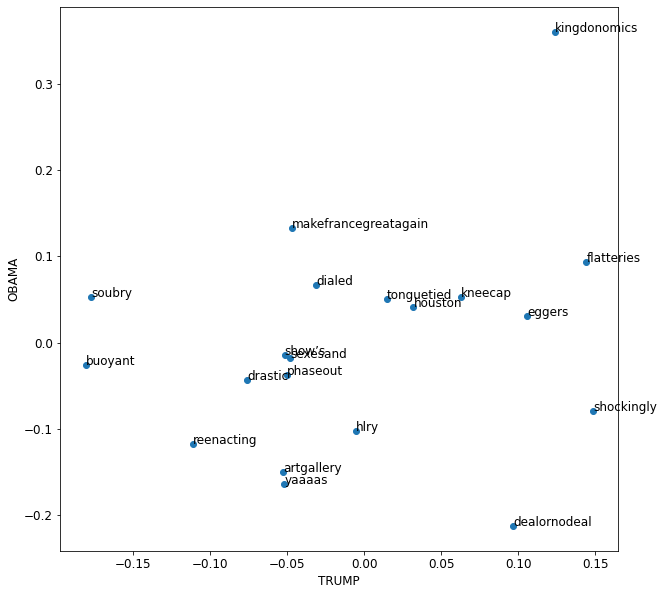

In [85]:
# Simple plot

plt.rcParams.update({'font.size': 12})
_, ax = plt.subplots(figsize=(10, 10))
ax.scatter(trump_scores, obama_scores)
plt.xlabel ('TRUMP')
plt.ylabel ('OBAMA')

for i, txt in enumerate(america_terms):
    ax.annotate(txt, (trump_scores[i], obama_scores[i]))